#### *Number of Police Incidents by Neighborhood, 2023* - **Kambin Zarei**
##### [Link to Data](https://data.wprdc.org/dataset/uniform-crime-reporting-data)

The sub-metric that I will discuss in this notebook is the number of police incidents in Pittsburgh neighborhoods from **January to August 2023**. This sub-metric will be constructed using the "Incidents.csv" file in this notebook's repository. The program below will use the "**Pandas**" and "**matplotlib**" Python libraries to manipulate and visualize the dataset in question. I have selected this sub-metric because safety can give us insight on the quality of life in a given neighborhood. 

Note: I will **not take population into consideration** when examining the dataset. 

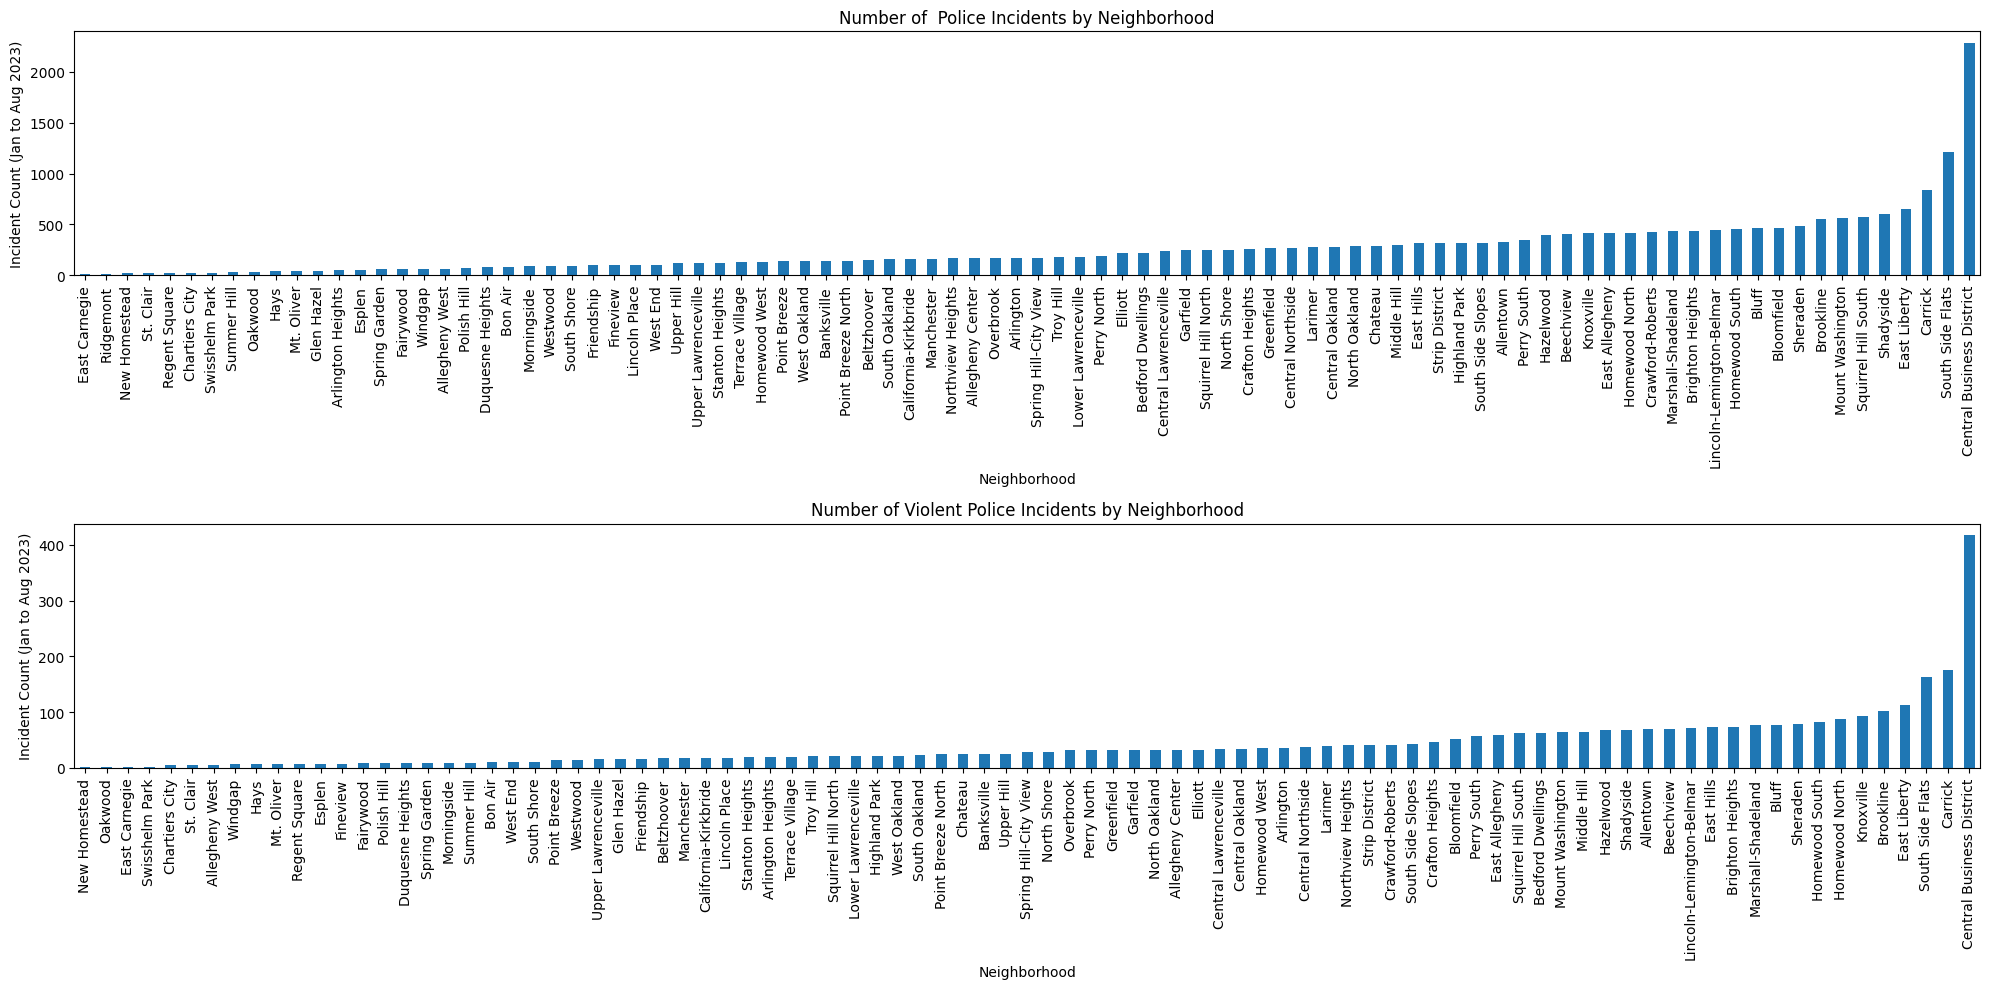

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 

VIOLENT_CRIMES_KWORDS = ["AGG", "ASSAULT", "ARSON","RAPE", "KIDNAPPING",
                          "THREAT", "INTIM", "HARRASSMENT", "SEX", 
                          "ABUSE", "MURDER", "ROBBERY", "EXTORTION"] 

# Key words to filter values in the INCIDENTNEIGHBORHOOD column
EXCLUDE_KWORDS = ["Outside", "Mt. Oliver Boro"]

# Address issue of integrating incidents data frame with other team 
# members' data frames
RENAME_NEIGHBORHOODS = {
    "Mount Oliver": "Mt. Oliver",
    "Central North Side": "Central Northside",
}

def main():
    # Create dataframe
    incidents = pd.read_csv("Incidents.csv")        
    
    for k, v in RENAME_NEIGHBORHOODS.items():
        incidents = incidents.replace(k, v)
        
    # Create series containing incident counts
    incident_counts = create_series(incidents)

    # Plot series as bar graph subplots
    visualize_data(incident_counts)
    

def create_series(incs):
    incident_counts = {}
    str_filter = lambda c, a: incs[c].str.contains(**a)
    masks = {
        "year": str_filter("INCIDENTTIME", {"pat": "2023"}),
        "neighborhoods": str_filter("INCIDENTNEIGHBORHOOD", 
            {"pat": "|".join(EXCLUDE_KWORDS), "na": False}
        ),

        "violence": str_filter(
            "INCIDENTHIERARCHYDESC",
            {"pat": "|".join(VIOLENT_CRIMES_KWORDS), "na": False}
        ),
    }
    
    # Remove incidents before 2023 and outside relevant neighborhoods
    incident_counts["all"] = incs[masks["year"] & ~masks["neighborhoods"]]

    # Remove non-violent incidents and export new dataframe as a CSV file
    incident_counts["violent"] = incident_counts["all"].loc[masks["violence"]]
    incident_counts["violent"].to_csv("Violent_Incidents.csv")


    for k, v in incident_counts.items():
        # Create a series counting the number of incidents in 
        # the current dataframe
        v = v.pivot_table(
            index=["INCIDENTNEIGHBORHOOD"],
            aggfunc="size"
        )

        # Sort neighborhoods by incident count
        incident_counts[k] = v.sort_values(ascending=True)

    return incident_counts

def visualize_data(inc_counts):
    graph_title = "Number of Violent Police Incidents by Neighborhood"

    # Subplot axis counter
    i = 0
    # Create subplots (2 rows, 1 column)
    fig, axes = plt.subplots(2)

    # Plot the two series
    for k, s in inc_counts.items(): 

        s.plot.bar(
            ax=axes[i],
            xlabel = "Neighborhood",
            ylabel = "Incident Count (Jan to Aug 2023)",
            title = graph_title.replace("Violent", "") 
                    if k == "all" else graph_title,
            # Figure size with x = 20 to prevent bar names from 
            # overlapping
            figsize = (20,10)
        )
        
        # Increment axis counter
        i += 1
    
    # Prevent issues with (visual) overlap between the two plots
    fig.tight_layout()
    return 

main()

The *first subplot* pertains to *all* police incidents and the *second subplot* pertains to *violent* incidents only (as defined by the keywords in the global dictionary "VIOLENT_CRIME_KWORDS"). Both plots count incidents that occured between **January 2023 and August 2023**. The subplots, which are sorted in ascending order, reveal that East Carnegie contained the least amount of total incidents and New Homestead contained the least amount of violent incidents. In addition, the subplots show that Central Business District contained the greatest amount of total and the greatest amount of violent incidents.

From these observations, I conclude that **New Homestead** is the best neighborhood in Pittsburgh because it has the lowest number of violent incidents for the January-August 2023 time period. As mentioned previously, this sub-metric does not take population into consideration, so I would likely arrive at a different conclusion if I were to analyze the crime rate of each neighborhood instead.